In [3]:
import cv2
import os

# Download YOLOv4 files if they don't exist
if not os.path.exists("yolov4.weights"):
    !wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.weights
if not os.path.exists("yolov4.cfg"):
    !wget https://raw.githubusercontent.com/AlexeyAB/darknet/master/cfg/yolov4.cfg

# Load model (cfg first, then weights)
net = cv2.dnn.readNetFromDarknet("yolov4.cfg", "yolov4.weights")

print("✅ YOLOv4 model loaded successfully!")
print("📦 Total layers:", len(net.getLayerNames()))

--2025-08-01 16:08:36--  https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.weights
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://release-assets.githubusercontent.com/github-production-release-asset/75388965/ba4b6380-889c-11ea-9751-f994f5961796?sp=r&sv=2018-11-09&sr=b&spr=https&se=2025-08-01T16%3A55%3A47Z&rscd=attachment%3B+filename%3Dyolov4.weights&rsct=application%2Foctet-stream&skoid=96c2d410-5711-43a1-aedd-ab1947aa7ab0&sktid=398a6654-997b-47e9-b12b-9515b896b4de&skt=2025-08-01T15%3A55%3A08Z&ske=2025-08-01T16%3A55%3A47Z&sks=b&skv=2018-11-09&sig=JGE17Uss%2FEEX3hQlDpI0rf856%2FahnqplF45TaHLPszs%3D&jwt=eyJhbGciOiJIUzI1NiIsInR5cCI6IkpXVCJ9.eyJpc3MiOiJnaXRodWIuY29tIiwiYXVkIjoicmVsZWFzZS1hc3NldHMuZ2l0aHVidXNlcmNvbnRlbnQuY29tIiwia2V5Ijoia2V5MSIsImV4cCI6MTc1NDA2NDgxNiwibmJmIjoxNzU0MDY0NTE2LCJwYXRoIjoicmVsZWFzZWFzc2V0cHJ

In [4]:
cap = cv2.VideoCapture("ward.mp4")
if not cap.isOpened():
    print("❌ Failed to open video.")
else:
    print("🎥 Video loaded successfully.")


🎥 Video loaded successfully.


In [5]:
layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers().flatten()]


In [6]:
classes = []
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]


In [8]:
import numpy as np


In [9]:
import cv2
import time
import numpy as np


In [14]:
import cv2
import time
import numpy as np  # You missed this import

# Load YOLOv4 model
net = cv2.dnn.readNetFromDarknet("yolov4.cfg", "yolov4.weights")
layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers().flatten()]

# Load video
cap = cv2.VideoCapture("ward.mp4")

# Output settings
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter("output_detected.mp4", fourcc, 20.0, (int(cap.get(3)), int(cap.get(4))))

# Load COCO classes
classes = []
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]

# Log file
log = open("bed_detection_log.txt", "w")

frame_count = 0
while True:
    ret, frame = cap.read()
    if not ret:
        break

    height, width = frame.shape[:2]
    blob = cv2.dnn.blobFromImage(frame, 1/255.0, (416, 416), swapRB=True, crop=False)
    net.setInput(blob)
    outs = net.forward(output_layers)

    boxes = []
    confidences = []
    class_ids = []

    for output in outs:
        for detection in output:
            scores = detection[5:]
            class_id = int(np.argmax(scores))
            confidence = scores[class_id]
            if confidence > 0.5 and classes[class_id] == "chair":  # Use 'chair' as proxy for bed
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)

                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
    bed_count = 0

    for i in indexes:
        i = i[0] if isinstance(i, (list, tuple)) else i
        x, y, w, h = boxes[i]
        bed_count += 1
        label = f"Bed {bed_count}"
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 255), 2)
        cv2.putText(frame, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 255), 2)

    log.write(f"\U0001F6CF\uFE0F Frame {frame_count}: Detected beds: {bed_count}\n")
    print(f"\U0001F6CF\uFE0F Frame {frame_count}: Detected beds: {bed_count}")
    frame_count += 1

    out.write(frame)

cap.release()
out.release()
log.close()

print("\u2705 Detection finished. Output saved to output_detected.mp4 and bed_detection_log.txt.")


🛏️ Frame 0: Detected beds: 0
🛏️ Frame 1: Detected beds: 1
🛏️ Frame 2: Detected beds: 1
🛏️ Frame 3: Detected beds: 1
🛏️ Frame 4: Detected beds: 1
🛏️ Frame 5: Detected beds: 0
🛏️ Frame 6: Detected beds: 0
🛏️ Frame 7: Detected beds: 0
🛏️ Frame 8: Detected beds: 0
🛏️ Frame 9: Detected beds: 0
🛏️ Frame 10: Detected beds: 0
🛏️ Frame 11: Detected beds: 0
🛏️ Frame 12: Detected beds: 0
🛏️ Frame 13: Detected beds: 0
🛏️ Frame 14: Detected beds: 0
🛏️ Frame 15: Detected beds: 0
🛏️ Frame 16: Detected beds: 1
🛏️ Frame 17: Detected beds: 1
🛏️ Frame 18: Detected beds: 0
🛏️ Frame 19: Detected beds: 0
🛏️ Frame 20: Detected beds: 0
🛏️ Frame 21: Detected beds: 0
🛏️ Frame 22: Detected beds: 0
🛏️ Frame 23: Detected beds: 0
🛏️ Frame 24: Detected beds: 0
🛏️ Frame 25: Detected beds: 0
🛏️ Frame 26: Detected beds: 0
🛏️ Frame 27: Detected beds: 0
🛏️ Frame 28: Detected beds: 0
🛏️ Frame 29: Detected beds: 1
🛏️ Frame 30: Detected beds: 1
🛏️ Frame 31: Detected beds: 1
🛏️ Frame 32: Detected beds: 0
🛏️ Frame 33: Detecte

In [18]:
import re
import csv

log_file = 'bed_detection_log.txt'
csv_file = 'bed_occupancy_report.csv'

frame_data = []

# Updated regex pattern for your log format
pattern = r"Frame (\d+): Detected beds: (\d+)"

with open(log_file, 'r', encoding='utf-8') as file:
    lines = file.readlines()

for line in lines:
    match = re.search(pattern, line)
    if match:
        frame = int(match.group(1))
        count = int(match.group(2))
        frame_data.append((frame, count))

# Save to CSV
with open(csv_file, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Frame', 'Beds Detected'])
    writer.writerows(frame_data)

# Print Report
print("📋 Log Analysis Report")
print(f"🔢 Total Frames Detected: {len(frame_data)}")
print(f"🛏️ Bed Occupancy Per Frame (showing first 10):")
for frame, count in frame_data[:10]:
    print(f"   Frame {frame}: {count} bed(s)")
print(f"\n📁 CSV saved as {csv_file}")


📋 Log Analysis Report
🔢 Total Frames Detected: 254
🛏️ Bed Occupancy Per Frame (showing first 10):
   Frame 0: 0 bed(s)
   Frame 1: 1 bed(s)
   Frame 2: 1 bed(s)
   Frame 3: 1 bed(s)
   Frame 4: 1 bed(s)
   Frame 5: 0 bed(s)
   Frame 6: 0 bed(s)
   Frame 7: 0 bed(s)
   Frame 8: 0 bed(s)
   Frame 9: 0 bed(s)

📁 CSV saved as bed_occupancy_report.csv


/tmp/ipython-input-3101764710.py:23: UserWarning: Glyph 128719 (\N{BED}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3101764710.py:24: UserWarning: Glyph 128719 (\N{BED}) missing from font(s) DejaVu Sans.
  plt.savefig("bed_occupancy_plot.png")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128719 (\N{BED}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


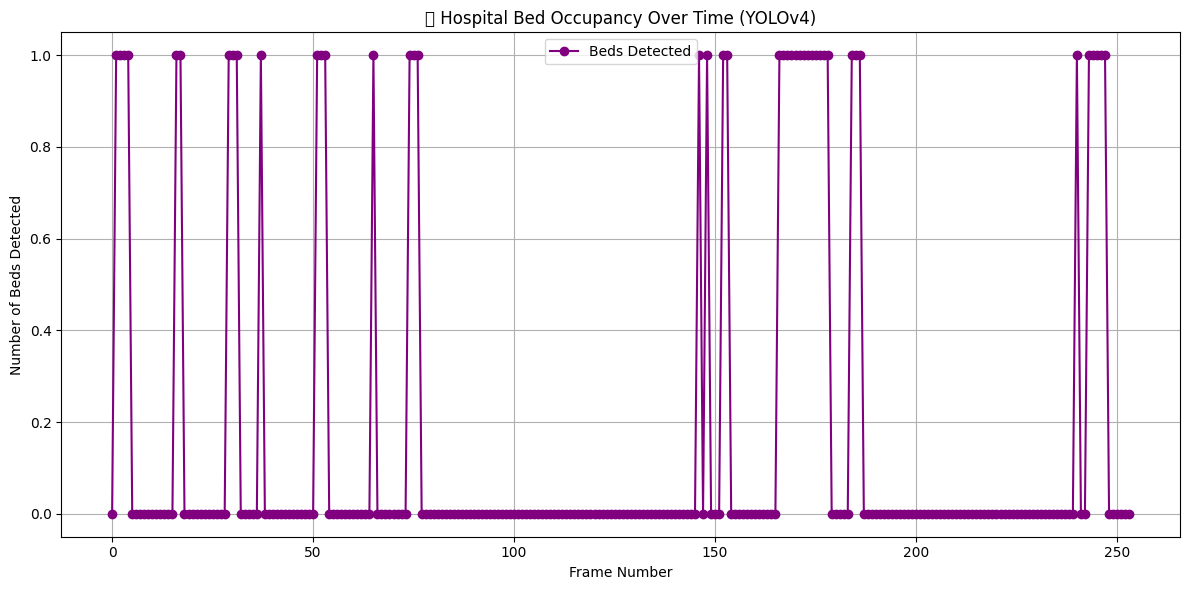

In [19]:
import csv
import matplotlib.pyplot as plt

# Read the CSV file
frames = []
counts = []

with open("bed_occupancy_report.csv", "r") as csvfile:
    next(csvfile)  # Skip header
    for row in csv.reader(csvfile):
        frames.append(int(row[0]))
        counts.append(int(row[1]))

# Plot
plt.figure(figsize=(12, 6))
plt.plot(frames, counts, marker='o', linestyle='-', color='purple', label='Beds Detected')

plt.title("🛏️ Hospital Bed Occupancy Over Time (YOLOv4)")
plt.xlabel("Frame Number")
plt.ylabel("Number of Beds Detected")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("bed_occupancy_plot.png")
plt.show()


In [ ]:
from google.colab import files

files.download("output_detected.mp4")
files.download("bed_detection_log.txt")
files.download("bed_occupancy_report.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>